## **CUSTOMER ACQUISITION COST PREDICTION**

## DATA EXPLORATION & VISUALIZATION 

In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
#import Dataset

import pandas as pd
import numpy as np

# this will be 'Y', or the dependent variable
target = "cost"

# read dataset and make a table
X = pd.read_csv("costpd.csv")

In [3]:
# Data Overview

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [4]:
# Data Describe

X.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


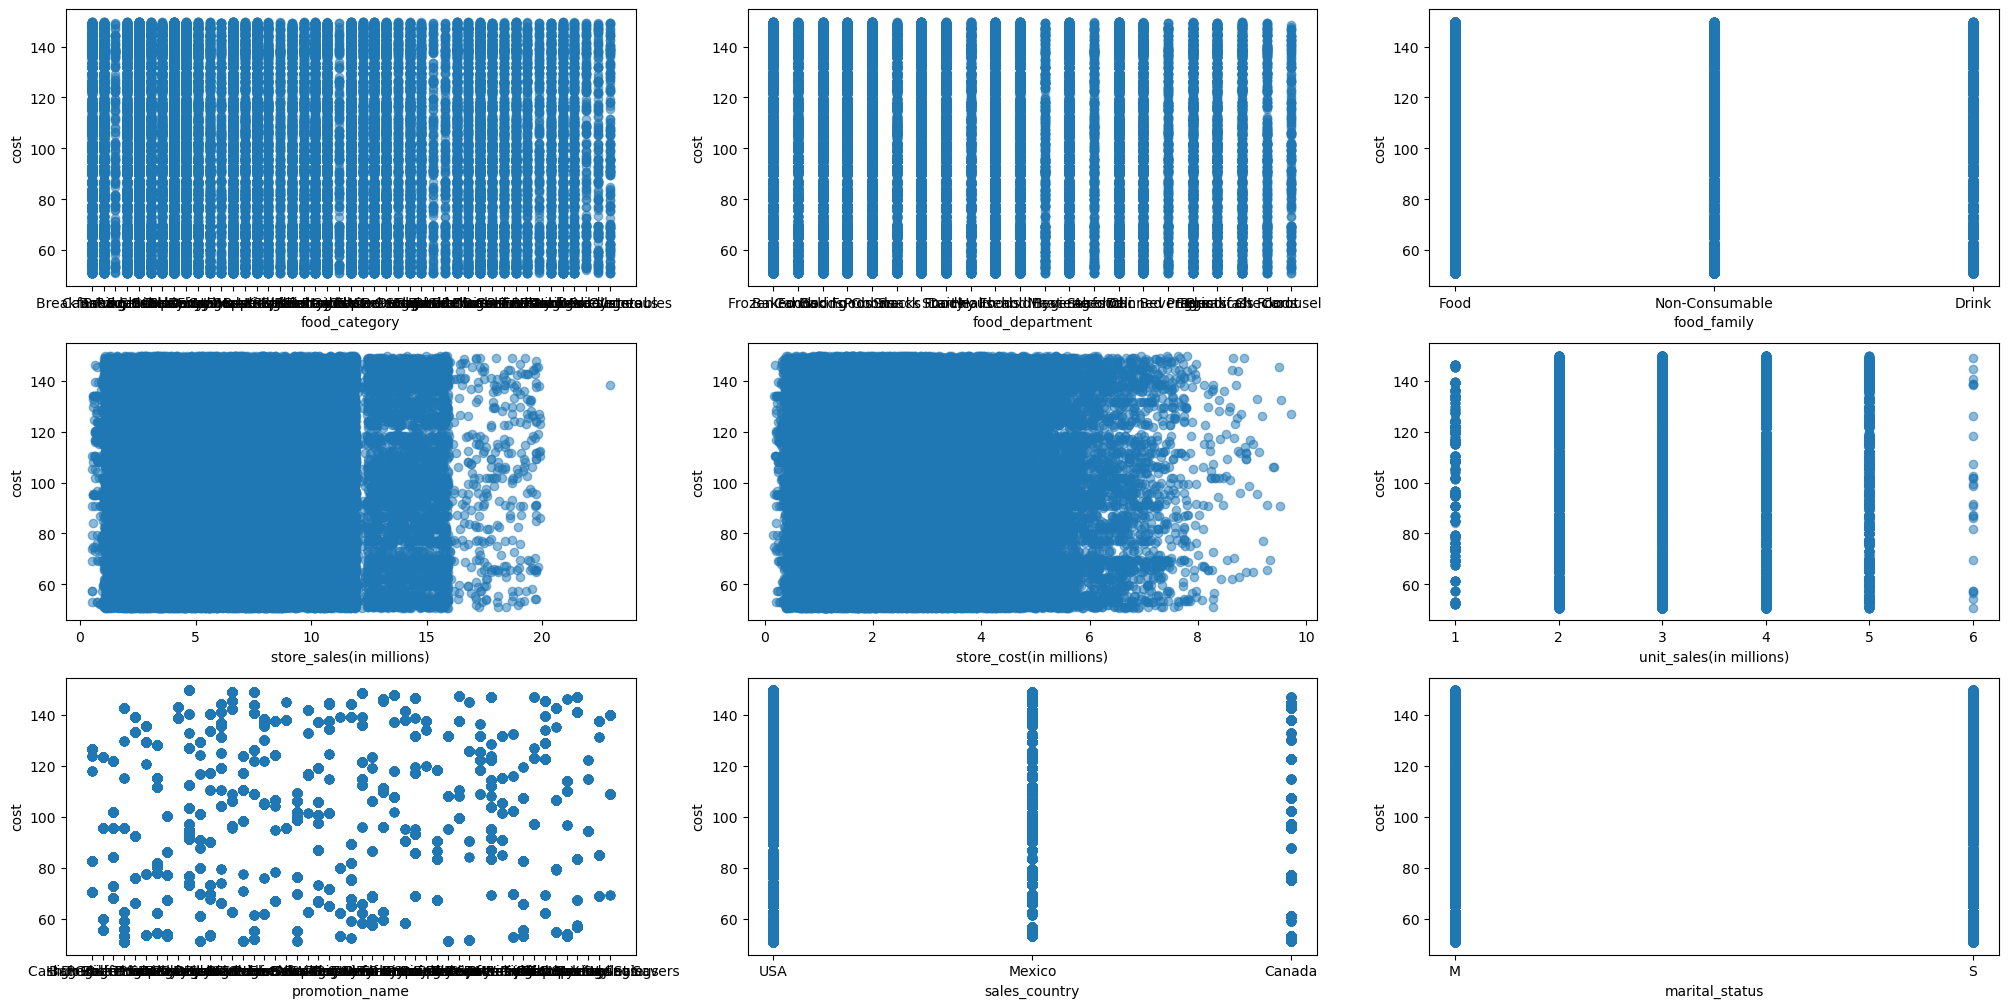

In [5]:
#Visualize distribution of features

%matplotlib inline
import math

import matplotlib.pyplot as plt

# plot with various axes scales
y = X[target].values.reshape(-1,1)
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel(target)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

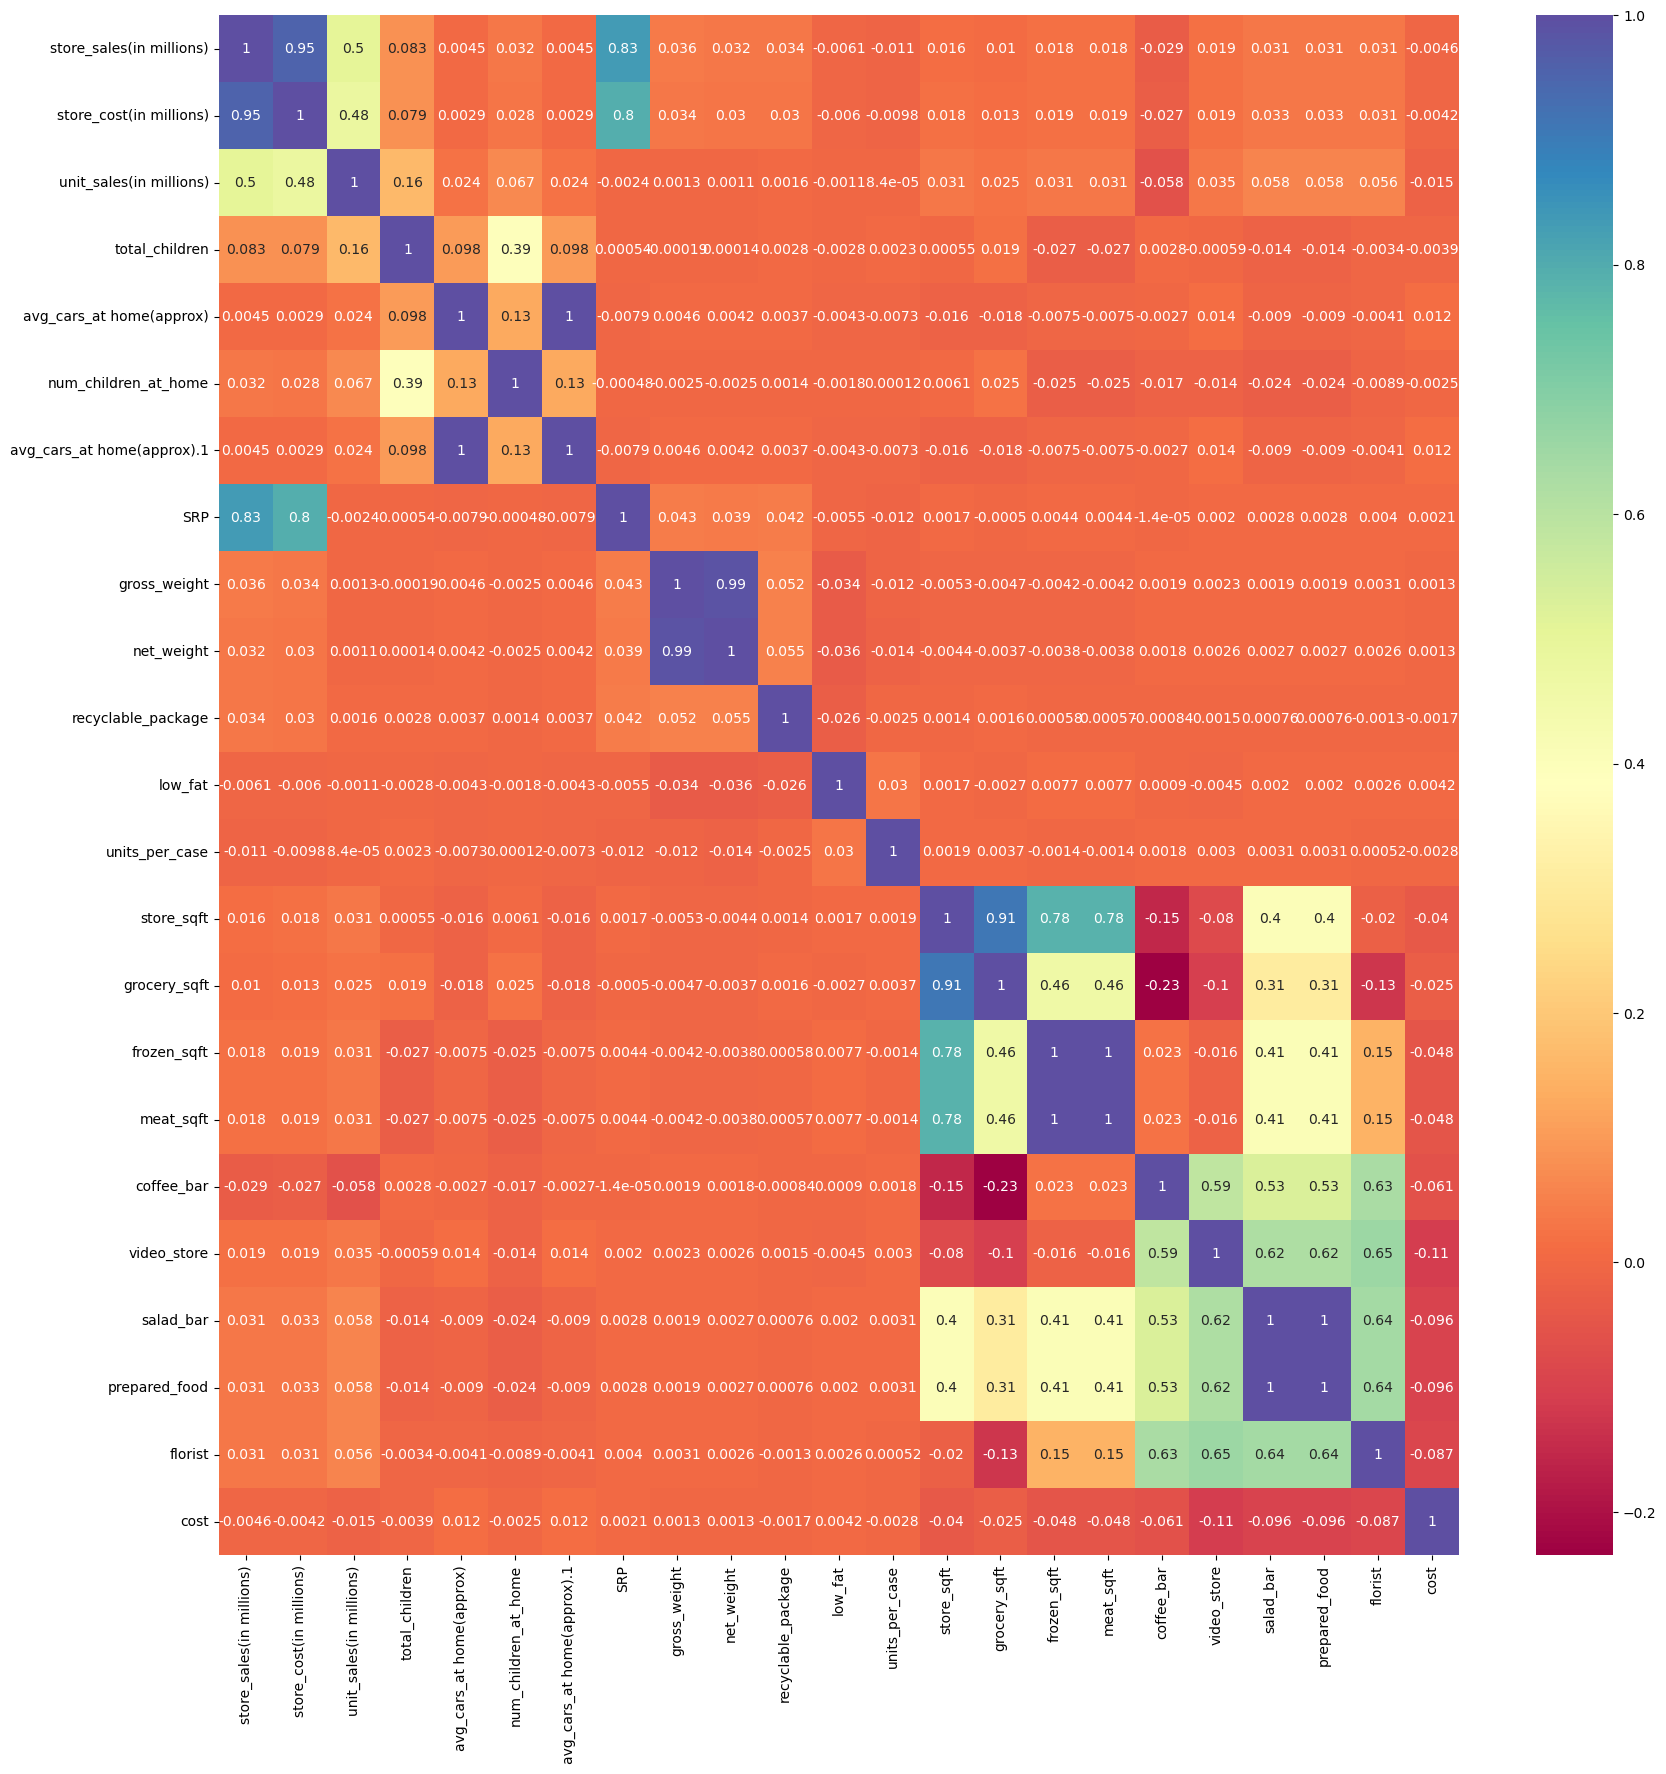

In [6]:
# co-relation view heat Map

import seaborn as sns

#correlation map view
X.corr() 
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(X.corr(), cmap='Spectral', annot = True)
plt.show()

## DATA PREPROCESSING

In [7]:
#Null Value check

X.isnull().sum() # None of the features contain null values


food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [8]:
# Check duplicate Values

X = X.drop_duplicates() # Dropping duplicate records
X.shape[0]

60428

In [9]:
# apply standarization to the values


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Encoding categorical values to numerical values
le = LabelEncoder()
y = X[target].values.reshape(-1,1)
X = X.drop(columns=[target])
X = X.apply(le.fit_transform)


# apply standarization to the values
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)

## BUILD MODEL

In [10]:
# Split the Data

from sklearn.model_selection import train_test_split

# set the seed for reproducibility
np.random.seed(127)

# split the dataset into 2 training and 2 testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.1, random_state=13)

print ("Shape of (X_train, X_test, y_train, y_test)")
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of (X_train, X_test, y_train, y_test)
(54385, 39) (6043, 39) (54385, 1) (6043, 1)


In [11]:
# Define Parameters

# define number of attributes
n_features = X_train.shape[1]
n_classes = 1  # quantitative data

# count number of samples in each set of data
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# define amount of neurons
n_layer_in = n_features  # 13 neurons in input layer
n_layer_h1 = 50          # first  hidden layer
n_layer_h2 = 50          # second hidden layer
n_layer_out = n_classes  # 1 neurons in output layer

sigma_init = 0.01   # For randomized initialization

In [12]:
#Build the multiperceptron Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(n_layer_h1, activation='relu', input_shape=(n_features,)))
model.add(Dense(n_layer_h2, activation='relu'))
model.add(Dense(n_classes))

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

model_history = model.fit(X_train, y_train, epochs=8000, validation_split=0.2)
model.evaluate(X_test, y_test)

Epoch 1/8000
1360/1360 [==============================] - 4s 2ms/step - loss: 1601.1797 - mae: 31.3193 - mse: 1601.1797 - val_loss: 878.3040 - val_mae: 25.1674 - val_mse: 878.3040
Epoch 2/8000
1360/1360 [==============================] - 2s 2ms/step - loss: 872.3989 - mae: 25.2959 - mse: 872.3989 - val_loss: 847.6033 - val_mae: 24.8097 - val_mse: 847.6033
Epoch 3/8000
1360/1360 [==============================] - 3s 2ms/step - loss: 855.0656 - mae: 25.0558 - mse: 855.0656 - val_loss: 826.6779 - val_mae: 24.5612 - val_mse: 826.6779
Epoch 4/8000
1360/1360 [==============================] - 3s 2ms/step - loss: 840.3267 - mae: 24.8381 - mse: 840.3267 - val_loss: 812.6105 - val_mae: 24.3359 - val_mse: 812.6105
Epoch 5/8000
1360/1360 [==============================] - 2s 2ms/step - loss: 820.2902 - mae: 24.4908 - mse: 820.2902 - val_loss: 792.5811 - val_mae: 23.8819 - val_mse: 792.5811
Epoch 6/8000
1360/1360 [==============================] - 3s 2ms/step - loss: 782.9313 - mae: 23.8135 - mse:

[1.4965808391571045, 0.6450390815734863, 1.4965808391571045]

## DATA ANALYSIS AND EVALUATION METRICS

In [13]:
#list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


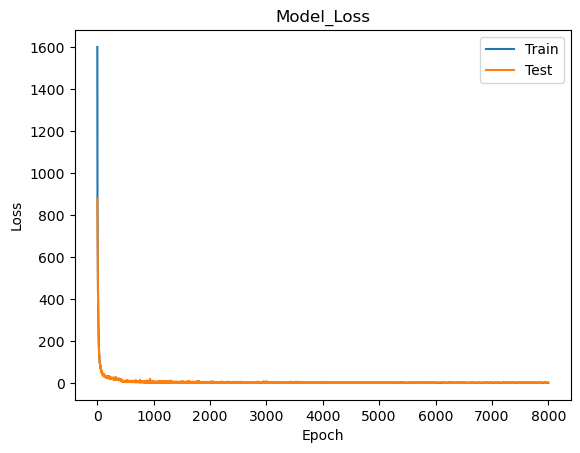

In [14]:
#summarize history for accuracy

from matplotlib import pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_mse'])
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [15]:
#Predicting the Test set results

y_pred = model.predict(X_test)
# model.save("cost-prediction-112722.h5")
# Uncomment this to load the golden model trained on 11/26/22
# y_pred = keras.models.load_model("cost-prediction-golden.h5").predict(X_test)

189/189 [==============================] - 1s 3ms/step


Actual
[array([50.79]), array([54.9]), array([55.59]), array([55.96]), array([57.52]), array([58.27]), array([59.86]), array([61.65]), array([64.99]), array([65.7]), array([66.37]), array([67.01]), array([68.15]), array([69.54]), array([69.63]), array([77.72]), array([77.72]), array([79.59]), array([79.95]), array([79.95]), array([80.29]), array([81.79]), array([82.62]), array([83.51]), array([83.55]), array([89.9]), array([95.74]), array([98.81]), array([101.65]), array([101.84]), array([106.1]), array([107.89]), array([110.5]), array([110.56]), array([114.01]), array([115.13]), array([118.36]), array([121.93]), array([122.47]), array([126.88]), array([137.47]), array([138.81]), array([139.37]), array([140.19]), array([141.39]), array([143.04]), array([143.04]), array([143.83]), array([144.18]), array([147.35])]

Predicted
[array([49.69207], dtype=float32), array([54.89572], dtype=float32), array([54.955048], dtype=float32), array([56.10357], dtype=float32), array([57.21179], dtype=fl

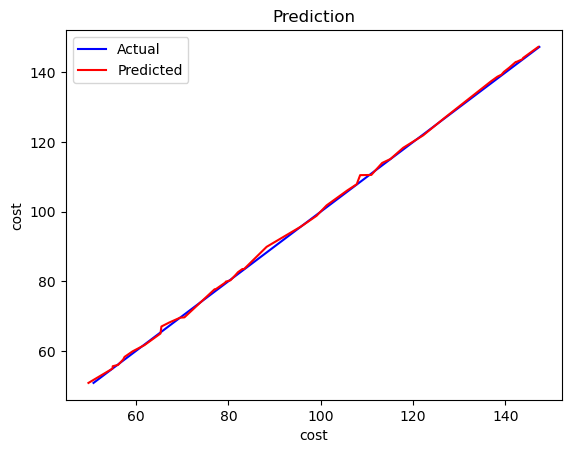

In [16]:
#Actual values against Predicted Values

print("Actual")
arr = []
res = []
count = 50
for item in y_test:
    if count > 0:
        arr.append(item)
    count-=1
arr.sort()
print (arr)

print("\nPredicted")
count = 50
for item in y_pred:
    if count > 0:
        res.append(item)
    count-=1
res.sort()
print (res)

plt.plot(arr, arr, label= 'Actual Values',color='b')
plt.plot(res, arr, label= 'Predicted Values',color='r')
plt.title('Prediction')
plt.ylabel('cost')
plt.xlabel('cost')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

In [17]:
# Evaluate MSE 

mse_res = tf.keras.metrics.MeanSquaredError()
mse_res.update_state(y_test,y_pred)
mse_res.result().numpy()

1.4965805

In [18]:
# Evaluate MAE 

mae_res = tf.keras.metrics.MeanAbsoluteError()
mae_res.update_state(y_test,y_pred)
mae_res.result().numpy()

0.6450388

In [19]:
# Evaluate RMSE 

rmse_res = tf.keras.metrics.RootMeanSquaredError()
rmse_res.update_state(y_test,y_pred)
rmse_res.result().numpy()

1.223348

In [20]:
# Evaluate R2 Score

import tensorflow_addons as tfa
r2score_metric = tfa.metrics.r_square.RSquare()
r2score_metric.update_state(y_test, y_pred)
r2score_res = r2score_metric.result()
r2score_res.numpy()

C:\Users\EndUser\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


0.9983626

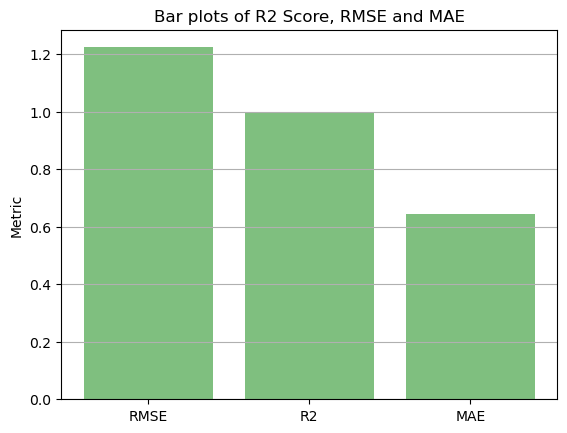

In [21]:
# Visualizing various metrics in bar graphs

labels = ['RMSE', 'R2', 'MAE']
x_pos = np.arange(len(labels))
fig, ax = plt.subplots()
ax.bar(x_pos, [rmse_res.result().numpy(), r2score_res.numpy(), mae_res.result().numpy()],
       align='center',
       alpha=0.5,
       ecolor='yellow',
       capsize=2,
       color='green')
ax.set_ylabel('Metric')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Bar plots of R2 Score, RMSE and MAE')
ax.yaxis.grid(True)

In [22]:
model.save("cost-prediction-112922.h5")